<a href="https://colab.research.google.com/github/akdeaso/diabetes-prediction/blob/main/diabetes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataset

In [ ]:
from google.colab import files
uploaded_file = files.upload()

Saving diabetes_data.csv to diabetes_data.csv


In [ ]:
df = pd.read_csv("diabetes_data.csv", sep = ";")

In [ ]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
df.shape

(520, 17)

# Data Transform

In [ ]:
df.loc[df["gender"] == "Female", ["gender"]] = 0
df.loc[df["gender"] == "Male", ["gender"]] = 1
df["gender"] = pd.to_numeric(df["gender"], downcast="integer")
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
df.describe()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Exploration

In [ ]:
countFemale = len(df[df.gender == 0])
countMale = len(df[df.gender == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.gender))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.gender))*100)))

Percentage of Female Patients: 36.92%
Percentage of Male Patients: 63.08%


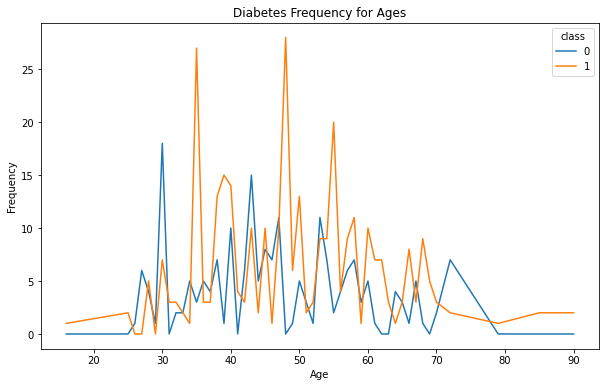

In [ ]:
pd.crosstab(df.age, df['class']).plot(figsize=(10,6))
plt.title('Diabetes Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

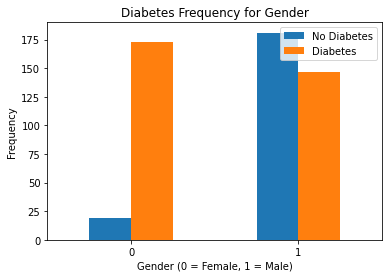

In [ ]:
pd.crosstab(df.gender, df['class']).plot(kind="bar")
plt.title('Diabetes Frequency for Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Diabetes", "Diabetes"])
plt.ylabel('Frequency')
plt.show()

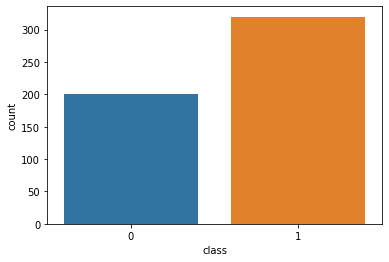

In [ ]:
sns.countplot(data = df, x = 'class')

# Model

In [ ]:
y = df['class'].values
x = df.drop(['class'], axis = 1)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler 

rus = RandomUnderSampler(random_state=101)
x_res, y_res = rus.fit_resample(x, y)

In [ ]:
np.unique(y_res, return_counts=True)

(array([0, 1]), array([200, 200]))

([<matplotlib.axis.XTick at 0x7f3adf281d50>,
 [Text(0, 0, 'no diabetes'), Text(0, 0, 'diabetes')])

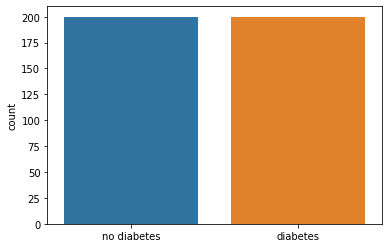

In [ ]:
sns.countplot(x = y_res)
plt.xticks(ticks = [0,1], labels=['no diabetes', 'diabetes'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics

In [ ]:
svm = SVC(C=100, kernel='linear', gamma='auto')
svm.fit(x_train, y_train)
y_svm_pred = svm.predict(x_test)
svm_report = metrics.classification_report(y_test, y_svm_pred)
print(svm_report)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        37
           1       0.97      0.94      0.95        67

    accuracy                           0.94       104
   macro avg       0.93      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104



In [ ]:
svm2 = SVC(C=1, kernel='linear', gamma='auto')
svm2.fit(x_train, y_train)
y_svm2_pred = svm2.predict(x_test)
svm2_report = metrics.classification_report(y_test, y_svm2_pred)
print(svm2_report)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        37
           1       0.94      0.87      0.90        67

    accuracy                           0.88       104
   macro avg       0.86      0.88      0.87       104
weighted avg       0.88      0.88      0.88       104



In [ ]:
lsvc = LinearSVC()
lsvc.fit(x_train, y_train)
y_lsvc_pred = lsvc.predict(x_test)
lsvc_report = metrics.classification_report(y_test, y_lsvc_pred)
print(lsvc_report)

              precision    recall  f1-score   support

           0       0.92      0.65      0.76        37
           1       0.83      0.97      0.90        67

    accuracy                           0.86       104
   macro avg       0.88      0.81      0.83       104
weighted avg       0.87      0.86      0.85       104



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
lsvc2 = LinearSVC(C=100)
lsvc2.fit(x_train, y_train)
y_lsvc2_pred = lsvc2.predict(x_test)
lsvc2_report = metrics.classification_report(y_test, y_lsvc2_pred)
print(lsvc2_report)

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        37
           1       1.00      0.67      0.80        67

    accuracy                           0.79       104
   macro avg       0.81      0.84      0.79       104
weighted avg       0.87      0.79      0.79       104



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[[35  2]
 [ 4 63]]


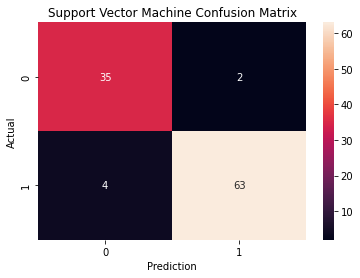

In [ ]:
cm_svm = metrics.confusion_matrix(y_test, y_svm_pred)
print(cm_svm)

plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm, annot=True, fmt = "d")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [ ]:
fitur_svm = pd.Series(svm.coef_[0], index = x_train.columns).sort_values(ascending = False)
print(fitur_svm)

polydipsia            3.656492
polyuria              3.500773
irritability          2.243660
polyphagia            1.116183
visual_blurring       0.866569
genital_thrush        0.808297
weakness              0.589114
sudden_weight_loss    0.299899
partial_paresis       0.297081
delayed_healing       0.008013
age                  -0.022642
alopecia             -0.400385
obesity              -0.571053
muscle_stiffness     -0.800411
itching              -2.052716
gender               -3.697277
dtype: float64


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtc.get_depth()

8

In [ ]:
y_dtc_pred = dtc.predict(x_test)
dtc_report = metrics.classification_report(y_test, y_dtc_pred)
print(dtc_report)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        37
           1       0.96      0.97      0.96        67

    accuracy                           0.95       104
   macro avg       0.95      0.94      0.95       104
weighted avg       0.95      0.95      0.95       104



In [ ]:
dtc_model = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth':[10, 20, 30, 40]}
tree_grid_dtc = GridSearchCV(estimator=dtc_model, param_grid=param_grid, cv=3)
tree_grid_dtc.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40]})

In [ ]:
tree_grid_dtc.best_params_

{'criterion': 'gini', 'max_depth': 30}

In [ ]:
pd.DataFrame(tree_grid_dtc.cv_results_)[['param_criterion', 'param_max_depth', 
'mean_test_score']].sort_values('mean_test_score', ascending=False)

,param_criterion,param_max_depth,mean_test_score
2,gini,30,0.961579
1,gini,20,0.961561
6,entropy,30,0.961561
0,gini,10,0.959163
4,entropy,10,0.959163
3,gini,40,0.956765
7,entropy,40,0.954332
5,entropy,20,0.949553


In [ ]:
dtc2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 30)
dtc2.fit(x_train, y_train)
y_dtc2_pred = dtc2.predict(x_test)
dtc2_report = metrics.classification_report(y_test, y_dtc2_pred)
print(dtc2_report)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        37
           1       0.96      0.97      0.96        67

    accuracy                           0.95       104
   macro avg       0.95      0.94      0.95       104
weighted avg       0.95      0.95      0.95       104



[[34  3]
 [ 2 65]]


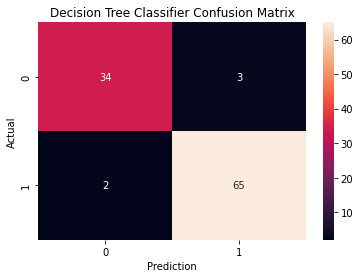

In [ ]:
cm_dtc2 = metrics.confusion_matrix(y_test, y_dtc2_pred)
print(cm_dtc2)

plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc2, annot=True, fmt = "d")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [ ]:
fitur_dtc2 = pd.Series(index=x.columns, data=dtc2.feature_importances_).sort_values(ascending = False)
print(fitur_dtc2)

polyuria              0.469335
polydipsia            0.104024
alopecia              0.089762
gender                0.084190
age                   0.062511
delayed_healing       0.033551
muscle_stiffness      0.030689
sudden_weight_loss    0.030263
visual_blurring       0.025219
obesity               0.023804
genital_thrush        0.021016
irritability          0.016752
itching               0.006725
partial_paresis       0.002158
polyphagia            0.000000
weakness              0.000000
dtype: float64


# Model & Feature Selection

In [ ]:
y = df['class'].values
x = df[['polyuria', 'polydipsia', 'alopecia', 'gender', 'age']].values

In [ ]:
from imblearn.under_sampling import RandomUnderSampler 

rus = RandomUnderSampler(random_state=101)
x_res, y_res = rus.fit_resample(x, y)

In [ ]:
np.unique(y_res, return_counts=True)

(array([0, 1]), array([200, 200]))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
final_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 30)
final_model.fit(x_train, y_train)
y_final_model_pred = final_model.predict(x_test)
final_model_report = metrics.classification_report(y_test, y_final_model_pred)
print(final_model_report)

              precision    recall  f1-score   support

           0       0.83      0.95      0.88        40
           1       0.97      0.88      0.92        64

    accuracy                           0.90       104
   macro avg       0.90      0.91      0.90       104
weighted avg       0.91      0.90      0.90       104



[[38  2]
 [ 8 56]]


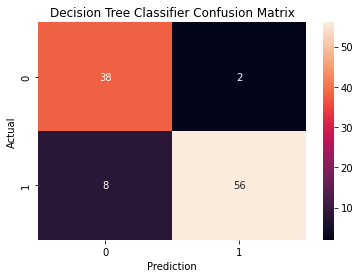

In [ ]:
cm_final_model = metrics.confusion_matrix(y_test, y_final_model_pred)
print(cm_final_model)

plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_final_model, annot=True, fmt = "d")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

# Save Model

In [ ]:
import pickle
pickle.dump(final_model, open('model.pkl','wb'))